In [1]:
import math
import os
import nltk
import string
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction

with open('/Users/dudu/Documents/MyPython/sherlock/bery.txt') as lit:
    temp = lit.readlines()
    result1 = " ".join(temp)
    
with open('/Users/dudu/Documents/MyPython/sherlock/blue.txt') as lit:
    temp = lit.readlines()
    result2 = " ".join(temp)
    
with open('/Users/dudu/Documents/MyPython/sherlock/bosc.txt') as lit:
    temp = lit.readlines()
    result3 = " ".join(temp)

with open('/Users/dudu/Documents/MyPython/sherlock/copp.txt') as lit:
    temp = lit.readlines()
    result4 = " ".join(temp)

with open('/Users/dudu/Documents/MyPython/sherlock/engr.txt') as lit:
    temp = lit.readlines()
    result5 = " ".join(temp)

with open('/Users/dudu/Documents/MyPython/sherlock/five.txt') as lit:
    temp = lit.readlines()
    result6 = " ".join(temp)

with open('/Users/dudu/Documents/MyPython/sherlock/iden.txt') as lit:
    temp = lit.readlines()
    result7 = " ".join(temp)

with open('/Users/dudu/Documents/MyPython/sherlock/nobi.txt') as lit:
    temp = lit.readlines()
    result8 = " ".join(temp)

with open('/Users/dudu/Documents/MyPython/sherlock/redh.txt') as lit:
    temp = lit.readlines()
    result9 = " ".join(temp)

with open('/Users/dudu/Documents/MyPython/sherlock/scan.txt') as lit:
    temp = lit.readlines()
    result10 = " ".join(temp)

with open('/Users/dudu/Documents/MyPython/sherlock/spec.txt') as lit:
    temp = lit.readlines()
    result11 = " ".join(temp)
    
with open('/Users/dudu/Documents/MyPython/sherlock/twis.txt') as lit:
    temp = lit.readlines()
    result12 = " ".join(temp)
    


In [2]:
# 计算数据集原始大小
sum = len(result1)+len(result2)+len(result3)+len(result4)+len(result5)+len(result6)+len(result7)+len(result8)
sum = sum + len(result9) +len(result10)+len(result11)+len(result12)
print sum

647178


In [3]:
#文档预处理
def get_tokens(text):
    lower = text.lower()
    tokens = nltk.word_tokenize(lower.translate(None,string.punctuation))
    filtered = [w for w in tokens if not w in stopwords.words('english')]
    return filtered

aa = " ".join(get_tokens(result1))
bb = " ".join(get_tokens(result2))
cc = " ".join(get_tokens(result3))
dd = " ".join(get_tokens(result4))
ee = " ".join(get_tokens(result5))
ff = " ".join(get_tokens(result6))
gg = " ".join(get_tokens(result7))
hh = " ".join(get_tokens(result8))
ii = " ".join(get_tokens(result9))
jj = " ".join(get_tokens(result10))
kk = " ".join(get_tokens(result11))
ll = " ".join(get_tokens(result12))

In [4]:
#合并处理结果
results = [aa,bb,cc,dd,ee,ff,gg,hh,ii,jj,kk,ll]
docNum = len(results)

In [5]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(results)
word = vectorizer.get_feature_names()

print len(word) 
print "term frequency in each doc"
print x.toarray()

8288
term frequency in each doc
[[0 0 5 ... 0 0 0]
 [0 1 1 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [0 0 1 ... 0 0 0]]


In [6]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(x)
tfidf_array = tfidf.toarray()
print "tfidf for each word in each doc" 
print tfidf_array

tfidf for each word in each doc
[[0.         0.         0.04212841 ... 0.         0.         0.        ]
 [0.         0.01102865 0.00874441 ... 0.         0.         0.01284176]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00810754 ... 0.         0.01190648 0.        ]
 [0.         0.         0.00838016 ... 0.         0.         0.        ]]


In [7]:
#提取query里每一个单词的tf-idf值
from collections import defaultdict
query = "smart detective thrilling story detail solve case funny guilty motive die kill victim"
queryList = query.split()
queryResults = defaultdict(list)
for query in queryList:
    if query in word:
        index = word.index(query)
        for i in range(0, docNum):
            queryResults[query].append(round(tfidf_array[i][index],6))
    else:
        queryResults[query].append("--")
for item in queryResults:
    print "{}: {}".format(item, queryResults[item])


detective: [0.0, 0.015858, 0.006769, 0.0, 0.0, 0.0, 0.0, 0.007282, 0.014445, 0.0, 0.007352, 0.0]
case: [0.056013, 0.035773, 0.07635, 0.015163, 0.004991, 0.059173, 0.048503, 0.032856, 0.02444, 0.039792, 0.033168, 0.051425]
story: [0.045256, 0.005219, 0.017821, 0.013272, 0.034951, 0.018834, 0.0, 0.009586, 0.014261, 0.005805, 0.0, 0.010003]
thrilling: [0.012374, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
funny: [0.0, 0.0, 0.0, 0.006722, 0.0, 0.0, 0.017201, 0.0, 0.014445, 0.00882, 0.0, 0.007599]
die: [0.0, 0.0, 0.009415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012268, 0.0, 0.0]
guilty: [0.009387, 0.0, 0.008317, 0.0, 0.0, 0.01172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
detail: [0.0, 0.0, 0.0, 0.0, 0.008851, 0.009539, 0.0, 0.007282, 0.007223, 0.0, 0.007352, 0.0]
motive: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010567, 0.008948, 0.017749, 0.0, 0.0, 0.0]
solve: [0.0, 0.007929, 0.0, 0.006722, 0.0, 0.009539, 0.008601, 0.014565, 0.0, 0.0, 0.0, 0.0]
victim: [0.0, 0.0, 0.0, 0.008259, 0.0, 0.023439, 0.0, 0.0, 0.

defaultdict(<type 'float'>, {1: 0.12303, 2: 0.077621, 3: 0.118672, 4: 0.050138, 5: 0.048793, 6: 0.132244, 7: 0.084872, 8: 0.080519, 9: 0.102609, 10: 0.078953, 11: 0.065937, 12: 0.069027})


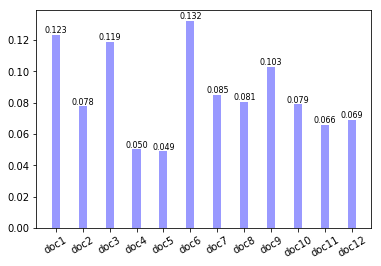

In [9]:
#计算idf score并用柱状图显示
idf_score = defaultdict(float)
for i in range(0,docNum):
    temp = 0
    for key in queryResults:
        temp += queryResults[key][i]
        idf_score[i+1] = (round(temp,6))
print idf_score

import matplotlib.pyplot as plt
%matplotlib inline
y = idf_score.values()
x = idf_score.keys()
docList = ['doc1','doc2','doc3','doc4','doc5','doc6','doc7','doc8','doc9','doc10','doc11','doc12',] 
plt.bar(x, y, width = 0.3, tick_label = docList, fc = '#9999ff')
plt.xticks(x, size='medium',rotation=30)
for a,b in zip(x,y):
    plt.text(a, b, '%.3f' %b, ha='center', va= 'bottom',fontsize=8)
plt.show()

In [10]:
#计算tf值
from collections import Counter
def tf(term, count):
    tf = 0
    if term in count:
        tf = count[term]
    return tf
tf_str = result1 + result2 + result3 + result4+ result5 + result6+ result7 + result8+ result9 + result10+ result11 + result12
temp = get_tokens(tf_str)
def stemmed(tokens, stemmer):
    stemmed = []
    for t in tokens:
        stemmed.append(stemmer.stem(t))
    return stemmed

tf_count = Counter(stemmed(temp, PorterStemmer()))
print len(tf_count)
queryS = []
for query in queryList:
    queryS.append(PorterStemmer().stem(query))
print queryS

queryTF = defaultdict(int)
for query in queryS:
    queryTF[query] = tf(query, tf_count)
for item in queryTF:
    print "{}: {}".format(item,queryTF[item])

6013
['smart', u'detect', u'thrill', u'stori', 'detail', u'solv', 'case', u'funni', u'guilti', u'motiv', 'die', 'kill', 'victim']
case: 133
detect: 8
thrill: 2
die: 25
detail: 26
funni: 7
stori: 37
motiv: 7
victim: 5
solv: 15
kill: 5
guilti: 3
smart: 3


In [11]:
print tf_count.most_common(10)

[('said', 486), ('upon', 464), (u'holm', 460), ('one', 380), ('would', 327), ('mr', 318), ('man', 301), ('could', 286), (u'littl', 269), ('see', 264)]


In [12]:
#计算idf值
resultList = [result1,result2,result3,result4,result5,result6,result7,result8,result9,result10,result11,result12]
resultL = [result1,result2,result3]
def count_term(text):
    tokens = get_tokens(text)
    stemming = stemmed(tokens,PorterStemmer())
    count = Counter(stemming)
    return count
count_list = []
for r in resultList:
    count_list.append(count_term(r))
print len(count_list)    

12


In [13]:
#计算idf值继续
def idf(term,count_list):
    idf = 0
    for count in count_list:
        if term in count:
            idf += 1
    return idf
idf_result = defaultdict(int)
for query in queryS:
    idf_result[query] = idf(query, count_list)
for item in idf_result:
    print "{}: {}".format(item, idf_result[item])
        

case: 12
detect: 5
thrill: 2
die: 5
detail: 11
funni: 5
stori: 10
motiv: 6
victim: 3
solv: 8
kill: 5
guilti: 3
smart: 3
